In [ ]:
using Plots
using Random
using StatsBase
using LinearAlgebra
using Printf
using Revise

In [ ]:
using PolygonAlgorithms
using PolygonAlgorithms: x_coords, y_coords

## Generate data

https://www.probabilitycourse.com/chapter5/5_3_2_bivariate_normal_dist.php

The following are correlated with $r$:

$$
X = \mu_X + \sigma_X Z_1 \\
Y = \mu_Y + \sigma_Y \left(r Z_1 + \sqrt{1-r^2}Z_2 \right)
$$

In [ ]:
r = -0.5
n = 500
μ_x = 2.0
σ_x = 1.5
z1 = randn(n)
x = μ_x .+ z1 .* σ_x;

μ_y = 2.0
σ_y = 0.9

y = μ_y .+ σ_y .* (r .* z1 .+ sqrt(1 - r^2) .* randn(n));

In [ ]:
cor(x, y)

-0.4650644623032057

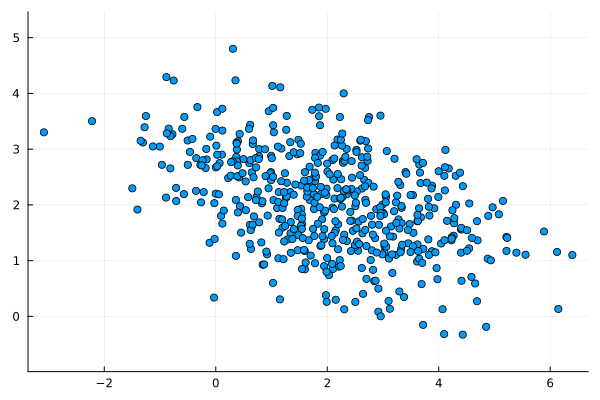

In [ ]:
scatter(x, y, aspectratio=:equal, label="")

In [ ]:
C = [
    [var(x) cov(x, y)] ;
    [cov(x, y) var(y)]
]

2×2 Matrix{Float64}:
  2.33806  -0.62232
 -0.62232   0.765854

## Convex Hull

In [ ]:
points = PolygonAlgorithms.matrix_to_points(permutedims(hcat(x, y)))
hull_idxs = convex_hull(points);
length(hull_idxs)

11

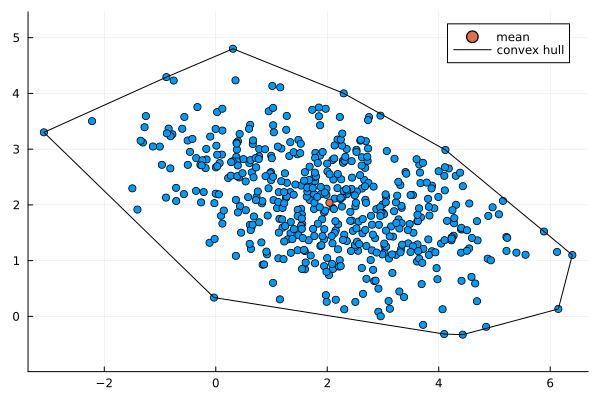

In [ ]:
x_mean = mean(x)
y_mean = mean(y)

base_plot = scatter(x, y, aspect=:equal, label="", aspectratio=:equal)
scatter!(base_plot, [x_mean], [y_mean], label="mean")
idxs = vcat(hull_idxs, hull_idxs[1])
plot!(base_plot, x[idxs], y[idxs], label="convex hull", color=:black)

base_plot

In [ ]:
hull_idxs

11-element Vector{Int64}:
  64
 398
  40
 182
 475
  68
  73
 263
 377
 410
 315

## Points in convex hull

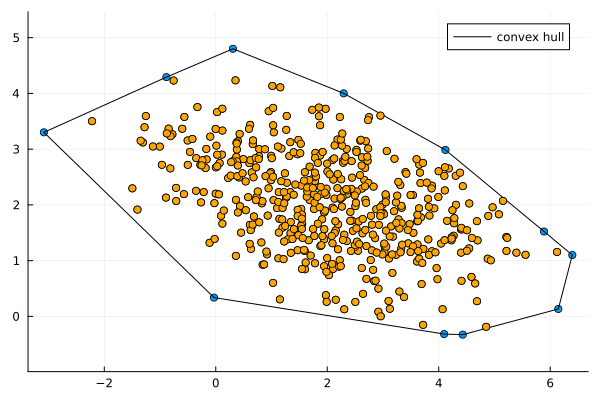

In [ ]:
hull = points[hull_idxs]
inside = [point_in_polygon(p, hull, on_border_is_inside=false) for p in points]

scatter(x, y, aspect=:equal, label="", aspectratio=:equal)
idxs = vcat(1:length(hull), 1)
plot!(x_coords(hull[idxs]), y_coords(hull[idxs]), label="convex hull", color=:black)
scatter!(x[inside], y[inside], aspect=:equal, label="", aspectratio=:equal, color=:orange)

## Polygon intersections

In [ ]:
r2 = 0.5
n2 = 500
μ2_x = 4.0
σ2_x = 1.0
z1 = randn(n)
x2 = μ2_x .+ z1 .* σ2_x;

μ2_y = 2.0
σ2_y = 0.4

y2 = μ2_y .+ σ2_y .* (r2 .* z1 .+ sqrt(1 - r2^2) .* randn(n));

# x2 = (x .- μ_x) .* 1.4 .+ μ_x;
# y2 = (y .- μ_y) .* 1.1 .+ μ_y;

# x2 = x .+ 10;
# y2 = y .+ 0;

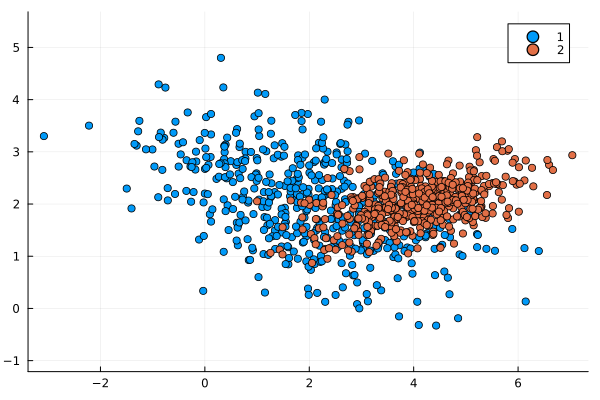

In [ ]:
double_plot = scatter(x, y, aspect=:equal, label="1", aspectratio=:equal)
scatter!(double_plot, x2, y2, label="2")

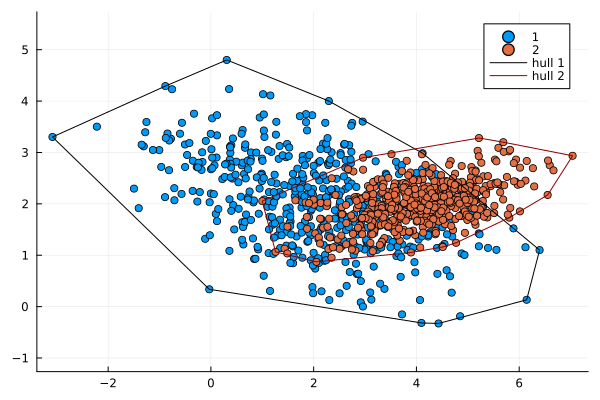

In [ ]:
points2 = PolygonAlgorithms.matrix_to_points(permutedims(hcat(x2, y2)))
hull_idxs2 = convex_hull(points2);
hull2 = points2[hull_idxs2]

idxs = vcat(hull_idxs, hull_idxs[1])
plot!(double_plot, x[idxs], y[idxs], label="hull 1", color=:black)

idxs2 = vcat(hull_idxs2, hull_idxs2[1])
plot!(double_plot, x2[idxs2], y2[idxs2], label="hull 2", color=:darkred)

In [ ]:
intersect_poly = intersect_convex(hull, hull2);

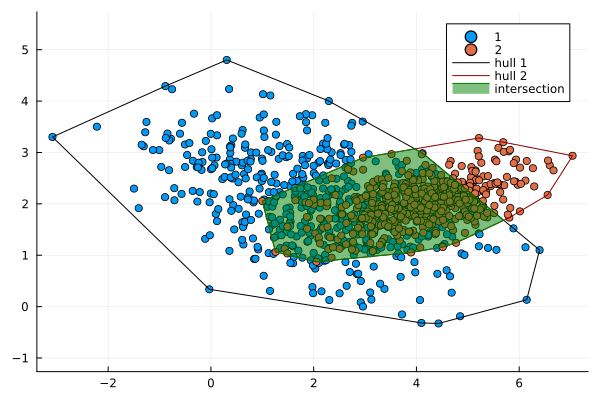

In [ ]:
if !isempty(intersect_poly)
    idxs = vcat(1:length(intersect_poly), 1)
    plot!(double_plot, x_coords(intersect_poly[idxs]), y_coords(intersect_poly[idxs]), 
        fill=(true, 0.5), label="intersection", color=:green)
end

In [ ]:
A1 = area_polygon(hull)
A2 = area_polygon(hull2)
area_inter = area_polygon(intersect_poly)

@printf("Area of 1: %.4f\n", A1)
@printf("Area of 2: %.4f\n", A2)
@printf("Area of intersection: %.4f\n", area_inter)
@printf("IoU : %.4f\n", area_inter / (A1 + A2 - area_inter))

Area of 1: 28.0718
Area of 2: 9.3222
Area of intersection: 6.7094
IoU : 0.2187
